**1. Problem Definition**

predicting scales based on features such as tv, radio, newspaper

**2.Data Collection**

Collect the data relevant to the problem. This could be from a CSV file, a database, or an API.

In [1]:
import pandas as pd
ad_df=pd.read_csv(r'advertising.csv')
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
ad_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
ad_df.columns.isnull()

array([False, False, False, False])

In [4]:
list(ad_df.columns)

['TV', 'Radio', 'Newspaper', 'Sales']

In [5]:
ad_df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

**step-3**

**feature selection and feature scaling**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [7]:
# correlatiion matrix
corr_matrix=ad_df.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


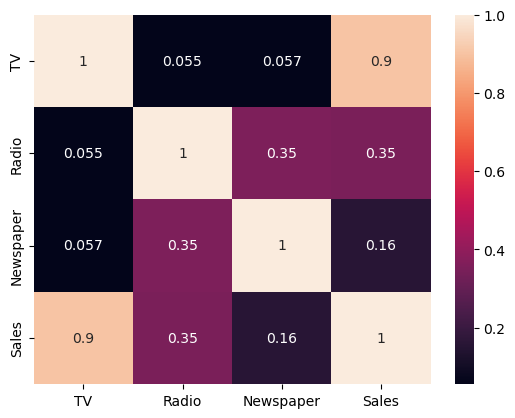

In [8]:
#visualize correlational matrix
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [9]:
# calculating vif
X=ad_df.drop('Sales',axis=1)
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

,features,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [10]:
vif_data['VIF']
con=vif_data['VIF']<15
vif_data[con]
vif_data[vif_data['VIF']<15]['features']
features_to_keep=vif_data[vif_data['VIF']<15]['features'].to_list()
features_to_keep

['TV', 'Radio', 'Newspaper']

In [11]:
# now scale the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_features=ss.fit_transform(ad_df[features_to_keep])


In [12]:
data_scaled=pd.DataFrame(scaled_features,columns=features_to_keep)
data_scaled['Sales']=ad_df['Sales']
data_scaled

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,14.0
197,0.349810,-0.942899,-1.111852,14.8
198,1.594565,1.265121,1.640850,25.5


**step-4**

**input data and output data**

In [13]:
X=ad_df.drop('Sales',axis=1)
y=ad_df['Sales']

In [14]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

**step-5**

**divide data into train and test**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

**QuickChecks**

**Check point 1**

- Original data shape

- X_train shape and X_test shape

- Check the rows and columns

In [17]:
data_scaled.shape  #  (rows,col=5)

#80*(20640)/100
X_train.shape   #(16512,4)
data_scaled.shape,X_train.shape,X_test.shape

((200, 4), (160, 3), (40, 3))

**Check point-2**

X_train rows should match with y_train rows count

X_test rows should match with y_test rows count

In [18]:
data_scaled.shape,X_train.shape,y_train.shape

((200, 4), (160, 3), (160,))

**Check point -3**

read the X_train and y_train and check the index

In [19]:
X_train.head()

,TV,Radio,Newspaper
146,240.1,7.3,8.7
32,97.2,1.5,30.0
43,206.9,8.4,26.4
99,135.2,41.7,45.9
88,88.3,25.5,73.4


In [20]:
y_train

146    18.2
32     13.2
43     17.9
99     17.2
88     12.9
       ... 
152    16.6
116    12.2
53     21.2
38     10.1
47     23.2
Name: Sales, Length: 160, dtype: float64

**step-6**

**model development**

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

**step-7**

**model prediction**

In [22]:
y_pred=lr.predict(X_test)
y_pred

array([15.40148707, 13.17751151, 12.83701542, 18.9766732 , 13.38841954,
       19.29317292, 10.45250245, 13.35120418,  9.07198142,  5.60984467,
       19.22019331, 22.09496709, 21.19013127, 19.72920229,  7.91677547,
        6.16700114,  9.29873033, 10.3894109 , 18.96222711,  9.46841405,
       22.88081454, 25.0323946 ,  7.08669623, 11.22799849, 20.27650437,
       21.90163356, 16.03292049, 10.11928853, 10.81565048, 18.20721048,
       11.29680852, 18.12743619, 21.66230749, 12.65732936, 15.02472839,
       16.98841377, 22.4487383 , 25.11052655,  8.72965159, 21.43684704])

**Step-8-Check Assumptions of Linear Regression**

- Linearity (features)

- Independence of errors (errors)

- Homoscedasticity(errors)

- Normality of residuals(errors)

- Multicollinearity(features)

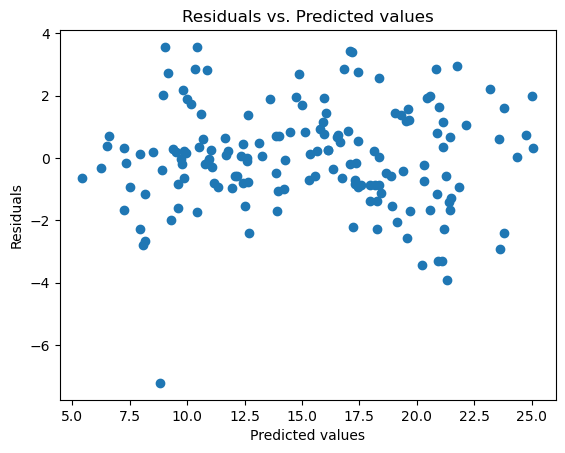

In [23]:
import matplotlib.pyplot as plt

# Plot residuals vs. predicted values
# train error
preds = lr.predict(X_train)
residuals = y_train - preds  # (actual-prediction)

plt.scatter(preds, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted values")
plt.show()


In [24]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 1.9050500310009535


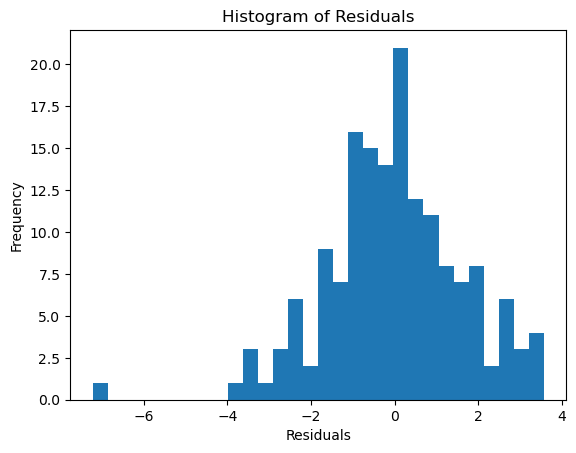

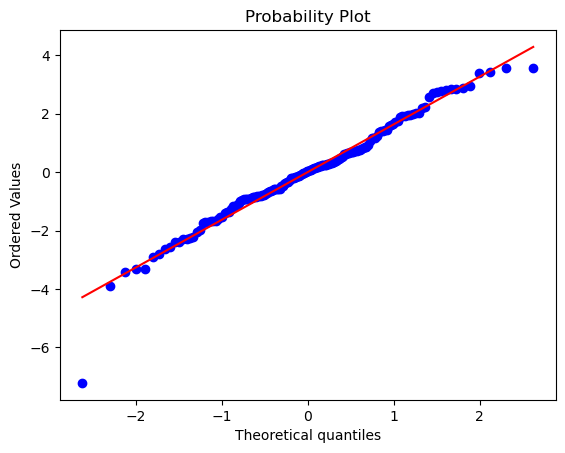

In [25]:
import scipy.stats as stats

# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


**step-9**

**model evaluation**

In [26]:
y_pred = lr.predict(X_test)
y_pred

array([15.40148707, 13.17751151, 12.83701542, 18.9766732 , 13.38841954,
       19.29317292, 10.45250245, 13.35120418,  9.07198142,  5.60984467,
       19.22019331, 22.09496709, 21.19013127, 19.72920229,  7.91677547,
        6.16700114,  9.29873033, 10.3894109 , 18.96222711,  9.46841405,
       22.88081454, 25.0323946 ,  7.08669623, 11.22799849, 20.27650437,
       21.90163356, 16.03292049, 10.11928853, 10.81565048, 18.20721048,
       11.29680852, 18.12743619, 21.66230749, 12.65732936, 15.02472839,
       16.98841377, 22.4487383 , 25.11052655,  8.72965159, 21.43684704])

In [27]:
print(y_pred[:5])  # Predictions
print(y_test.values[:5])  # actual

[15.40148707 13.17751151 12.83701542 18.9766732  13.38841954]
[14.8 10.1 11.9 19.8 14. ]


**models's performance**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
y_pred = lr.predict(X_test)
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 1.282536129603623
MSE: 3.025876484301784
RMSE: 1.7395046663639002
R-squared: 0.9086637457300811


**Step-10**:**Save The model**


**1) Using pickle**


- Save the model

- It is similar to python read text and write text

-  open (filename.txt,'w')

-  pickle.dump(model,open('modelname.pkl','wb'))

In [29]:
import pickle
pickle.dump(lr,
            open('sales_pred.pkl','wb'))


**Step-11**

**Load the model**

- open('filename.txt','r')

- pickle.load(open('modelname.pkl','rb'))

In [30]:
# Loading model to compare the results
model = pickle.load(open('sales_pred.pkl','rb'))
model

LinearRegression()

**step-12**

**predict on test data**

**batch prediction**

In [31]:
model.predict(X_test)

array([15.40148707, 13.17751151, 12.83701542, 18.9766732 , 13.38841954,
       19.29317292, 10.45250245, 13.35120418,  9.07198142,  5.60984467,
       19.22019331, 22.09496709, 21.19013127, 19.72920229,  7.91677547,
        6.16700114,  9.29873033, 10.3894109 , 18.96222711,  9.46841405,
       22.88081454, 25.0323946 ,  7.08669623, 11.22799849, 20.27650437,
       21.90163356, 16.03292049, 10.11928853, 10.81565048, 18.20721048,
       11.29680852, 18.12743619, 21.66230749, 12.65732936, 15.02472839,
       16.98841377, 22.4487383 , 25.11052655,  8.72965159, 21.43684704])

**real time prediction**

In [32]:
import warnings
warnings.filterwarnings('ignore')
model.predict([[100,200,300]])


array([31.56907289])

**2) Using Joblib**

In [33]:
import joblib

# Load the model from the .joblib file
joblib.dump(model, 'sales.joblib')

saved_model = joblib.load('sales.joblib')

# Use the loaded model for predictions
y_pred = saved_model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)
# y_pred compare with y_test

Predictions: [15.40148707 13.17751151 12.83701542 18.9766732  13.38841954 19.29317292
 10.45250245 13.35120418  9.07198142  5.60984467 19.22019331 22.09496709
 21.19013127 19.72920229  7.91677547  6.16700114  9.29873033 10.3894109
 18.96222711  9.46841405 22.88081454 25.0323946   7.08669623 11.22799849
 20.27650437 21.90163356 16.03292049 10.11928853 10.81565048 18.20721048
 11.29680852 18.12743619 21.66230749 12.65732936 15.02472839 16.98841377
 22.4487383  25.11052655  8.72965159 21.43684704]
